In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
import math

In [32]:
confirmed_cases=pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
confirmed_cases=confirmed_cases[confirmed_cases['Country/Region']=='Italy']
dates=confirmed_cases.keys()
confirmed_cases=confirmed_cases.loc[:, dates[34]:dates[-1]]
dates=confirmed_cases.keys()
confirmed=[]
days=[]
j=1
for i in dates:
    confirmed.append(confirmed_cases[i].sum())
    days.append(j)
    j=j+1
    
print(confirmed)

[20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021]


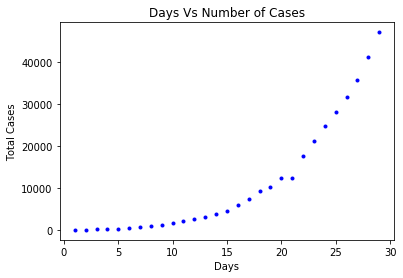

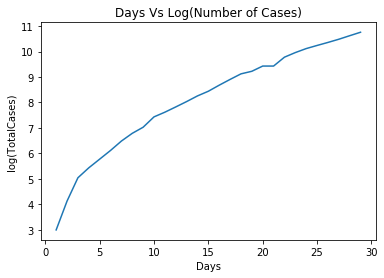

In [33]:
confirmed=np.array(confirmed)
days=np.array(days)

plt.xlabel("Days")
plt.ylabel("Total Cases")
plt.title("Days Vs Number of Cases")
plt.plot(days, confirmed, 'b.')
plt.show()

logConfirmed=[math.log(i) for i in confirmed]

plt.xlabel("Days")
plt.ylabel("log(TotalCases)")
plt.title("Days Vs Log(Number of Cases)")
plt.plot(days, logConfirmed)
plt.show()

In [34]:
logConfirmed=np.array(logConfirmed)

In [35]:
from sklearn.linear_model import LinearRegression

x_train=days[:, np.newaxis]
y_train=logConfirmed[:, np.newaxis]
print(x_train.shape)
print(y_train.shape)

myModel=LinearRegression()
myModel.fit(x_train, y_train)

x_test=x_train
y_test=myModel.predict(x_test)

(29, 1)
(29, 1)


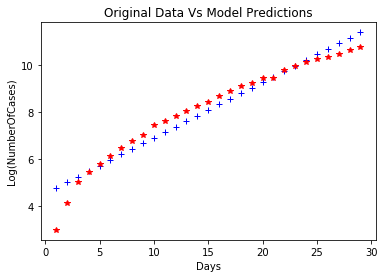

In [36]:
plt.xlabel("Days")
plt.ylabel("Log(NumberOfCases)")
plt.title("Original Data Vs Model Predictions")

plt.plot(x_test, y_test, 'b+')
plt.plot(x_train, y_train, 'r*')

plt.show()

In [37]:
y_confirmed_test=[]
for i in y_test:
    y_confirmed_test.append(math.pow(math.e, i))

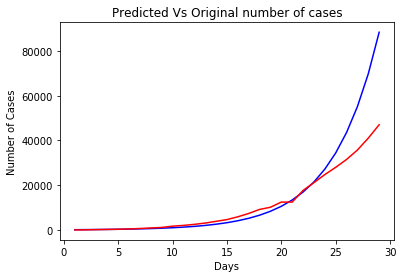

In [38]:
x_confirmed_test=days

plt.title("Predicted Vs Original number of cases")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.plot(x_confirmed_test, y_confirmed_test, 'b-')
plt.plot(days, confirmed, 'r-')

plt.show()

In [39]:
x_pred=np.arange(len(x_test)+14)[:, np.newaxis]
y_pred_log=myModel.predict(x_pred)

y_pred=[]
for i in y_pred_log:
    y_pred.append(math.pow(math.e, i))

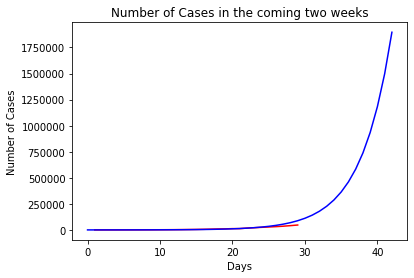

In [40]:
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number of Cases in the coming two weeks")
plt.plot(days, confirmed, 'r-')
plt.plot(x_pred, y_pred, 'b-')
plt.show()

In [41]:
print(myModel.coef_)
print(myModel.intercept_)

[[0.23587026]]
[4.54876098]
